In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from scipy import stats

In [2]:
data = pd.read_csv('fi_sp_customers_1_year.dsv', sep=';', low_memory=False)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18678 entries, 0 to 18677
Data columns (total 10 columns):
CUSTOMER_ID         18678 non-null int64
ORDERS              18678 non-null int64
FIRST_ORDER_DATE    18678 non-null object
LAST_ORDER_DATE     18678 non-null object
TOTAL_CM2           18678 non-null object
NET_SALES           18678 non-null object
CM2_REL             18678 non-null object
ZTQ_ID              18678 non-null int64
START_DATE          18678 non-null object
EXPIRY_DATE         18678 non-null object
dtypes: int64(3), object(7)
memory usage: 1.4+ MB


In [4]:
data['CM2_REL'] = [i.replace(',', '.') for i in data['CM2_REL']]
data['NET_SALES'] = [i.replace(',', '.') for i in data['NET_SALES']]
data['TOTAL_CM2'] = [i.replace(',', '.') for i in data['TOTAL_CM2']]

In [5]:
data[['TOTAL_CM2', 'NET_SALES', 'CM2_REL']] = data[['TOTAL_CM2', 'NET_SALES', 'CM2_REL']].astype(float)

In [6]:
data['FIRST_ORDER_DATE'] = pd.to_datetime(data['FIRST_ORDER_DATE'], format='%d/%m/%y')

In [7]:
data['LAST_ORDER_DATE'] = pd.to_datetime(data['LAST_ORDER_DATE'], format='%d/%m/%y')

In [8]:
data['START_DATE'] = pd.to_datetime(data['START_DATE'], format='%d/%m/%y')

In [9]:
data['EXPIRY_DATE'] = pd.to_datetime(data['EXPIRY_DATE'], format='%d/%m/%y')

In [10]:
data.head()

,CUSTOMER_ID,ORDERS,FIRST_ORDER_DATE,LAST_ORDER_DATE,TOTAL_CM2,NET_SALES,CM2_REL,ZTQ_ID,START_DATE,EXPIRY_DATE
0,8715811,6,2017-07-29,2018-04-26,117.3210,757.5920,15.49,54,2018-01-07,2021-01-07
1,7019035,9,2017-06-08,2018-05-10,102.1967,757.5747,13.49,54,2018-02-08,2021-02-08
2,5242366,4,2017-10-04,2018-04-01,99.9807,621.7661,16.08,54,2015-03-17,2018-04-01
3,5889183,4,2017-06-06,2018-03-19,147.4481,596.5728,24.72,54,2015-03-18,2018-03-18
4,5095946,4,2017-06-30,2018-04-03,102.4349,729.8236,14.04,54,2015-04-30,2018-04-30


In [11]:
tiers = [51, 52, 53, 54, 55, 56]

...........................................................TIER  51 ..........................................................


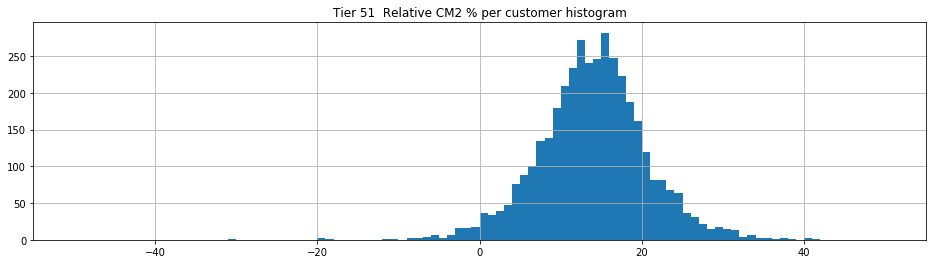

,CM2_REL
count,3845.00
mean,13.94
std,6.64
min,-30.88
25%,10.05
50%,14.02
75%,17.89
max,41.07


CM2% threshold >= 5  is the percentile 8.14
CM2% threshold >= 7  is the percentile 13.03
CM2% threshold >=  10.95  is the percentile 30 allowing us to stay with the 70% of our sample


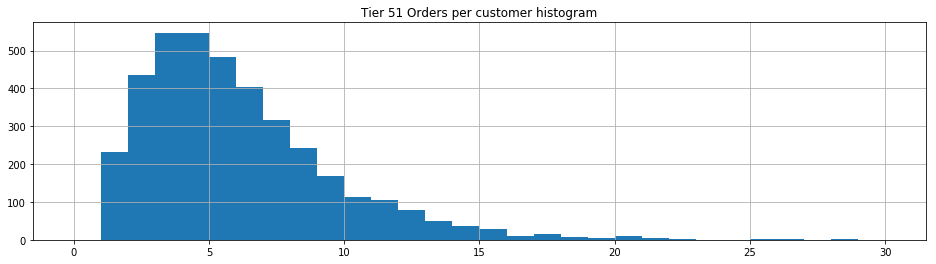

,ORDERS
count,3845.00
mean,5.55
std,3.49
min,1.00
25%,3.00
50%,5.00
75%,7.00
max,28.00


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  77.04  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  73.11  % from our customers
With CM2% threshold >=  10.95  and Orders >=  3.0  we keep eligible a  58.65  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  52 ..........................................................


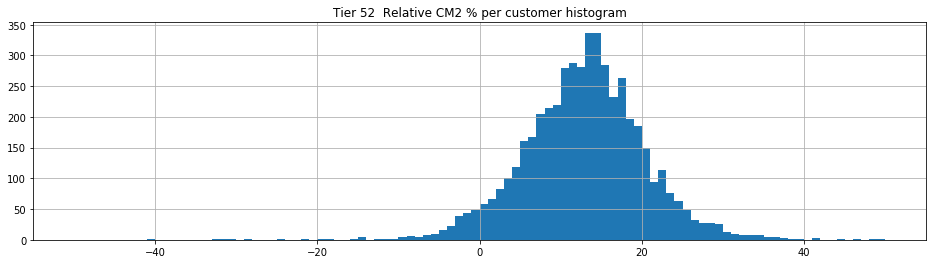

,CM2_REL
count,5018.00
mean,12.86
std,7.50
min,-40.74
25%,8.35
50%,13.14
75%,17.41
max,49.01


CM2% threshold >= 5  is the percentile 12.89
CM2% threshold >= 7  is the percentile 19.43
CM2% threshold >=  9.491  is the percentile 30 allowing us to stay with the 70% of our sample


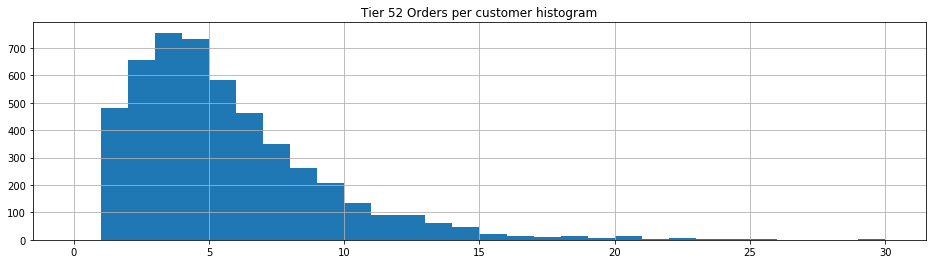

,ORDERS
count,5018.00
mean,5.16
std,3.58
min,1.00
25%,3.00
50%,4.00
75%,7.00
max,33.00


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  68.71  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  63.49  % from our customers
With CM2% threshold >=  9.491  and Orders >=  3.0  we keep eligible a  55.36  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  53 ..........................................................


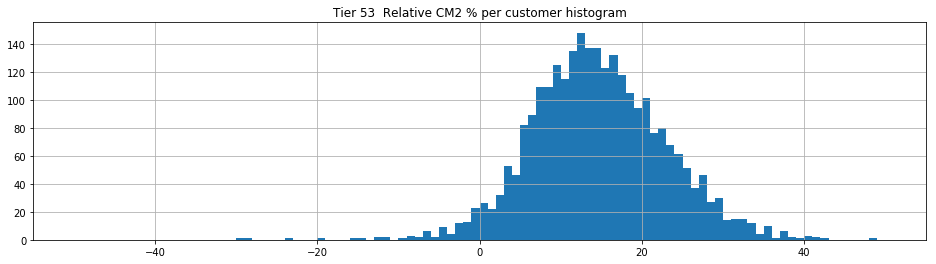

,CM2_REL
count,2686.00
mean,14.60
std,8.21
min,-29.37
25%,9.22
50%,14.18
75%,19.89
max,48.45


CM2% threshold >= 5  is the percentile 9.83
CM2% threshold >= 7  is the percentile 16.2
CM2% threshold >=  10.31  is the percentile 30 allowing us to stay with the 70% of our sample


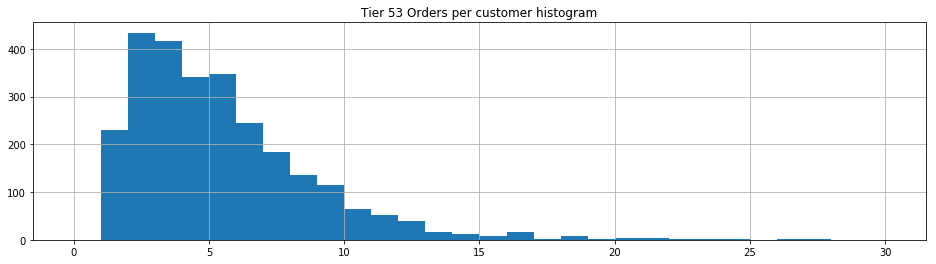

,ORDERS
count,2686.00
mean,4.95
std,3.33
min,1.00
25%,3.00
50%,4.00
75%,6.00
max,27.00


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  68.95  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  63.89  % from our customers
With CM2% threshold >=  10.31  and Orders >=  3.0  we keep eligible a  53.31  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  54 ..........................................................


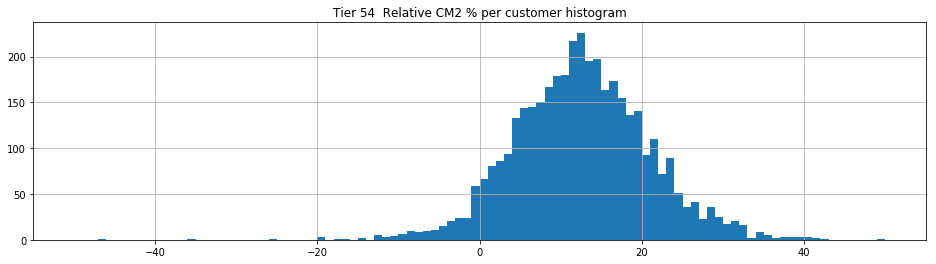

,CM2_REL
count,3903.00
mean,12.51
std,8.63
min,-128.51
25%,7.09
50%,12.46
75%,17.78
max,50.70


CM2% threshold >= 5  is the percentile 17.19
CM2% threshold >= 7  is the percentile 24.6
CM2% threshold >=  8.39  is the percentile 30 allowing us to stay with the 70% of our sample


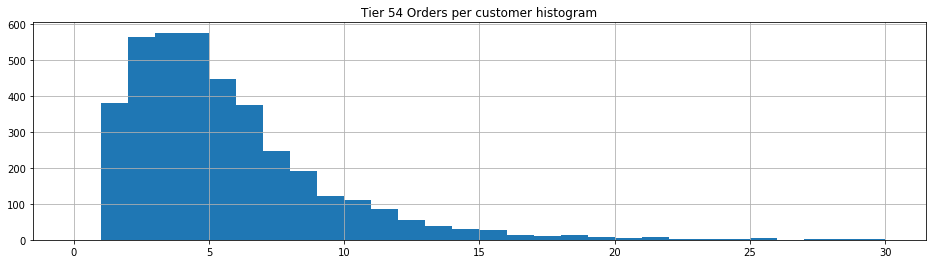

,ORDERS
count,3903.00
mean,5.12
std,3.74
min,1.00
25%,3.00
50%,4.00
75%,7.00
max,50.00


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  63.8  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  57.96  % from our customers
With CM2% threshold >=  8.39  and Orders >=  3.0  we keep eligible a  53.7  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  55 ..........................................................


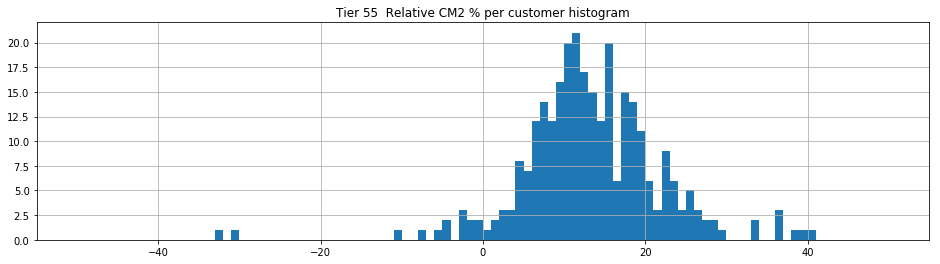

,CM2_REL
count,291.00
mean,13.24
std,8.65
min,-32.10
25%,8.57
50%,12.70
75%,18.02
max,40.13


CM2% threshold >= 5  is the percentile 10.65
CM2% threshold >= 7  is the percentile 17.18
CM2% threshold >=  9.83  is the percentile 30 allowing us to stay with the 70% of our sample


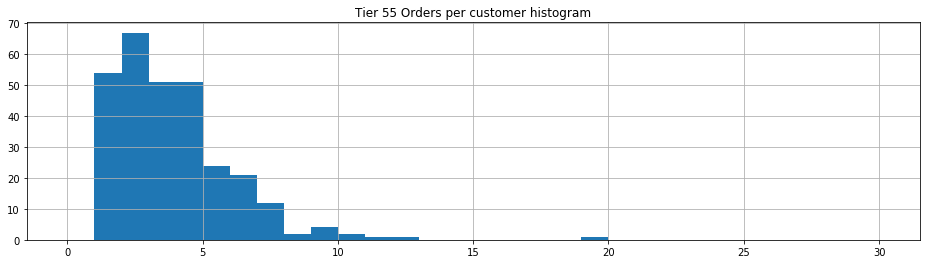

,ORDERS
count,291.00
mean,3.40
std,2.24
min,1.00
25%,2.00
50%,3.00
75%,4.00
max,19.00


2.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  2.0  we keep eligible a  74.91  % from our customers
With CM2% threshold >= 7 and Orders >=  2.0  we keep eligible a  69.76  % from our customers
With CM2% threshold >=  9.83  and Orders >=  2.0  we keep eligible a  58.42  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  56 ..........................................................


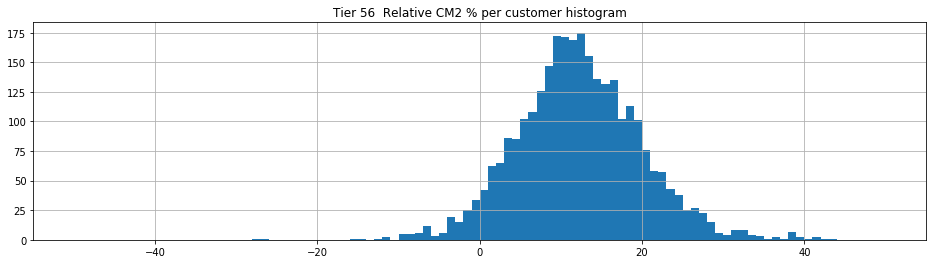

,CM2_REL
count,2935.00
mean,12.17
std,7.94
min,-96.19
25%,7.41
50%,11.97
75%,16.96
max,43.52


CM2% threshold >= 5  is the percentile 16.29
CM2% threshold >= 7  is the percentile 23.44
CM2% threshold >=  8.511999999999999  is the percentile 30 allowing us to stay with the 70% of our sample


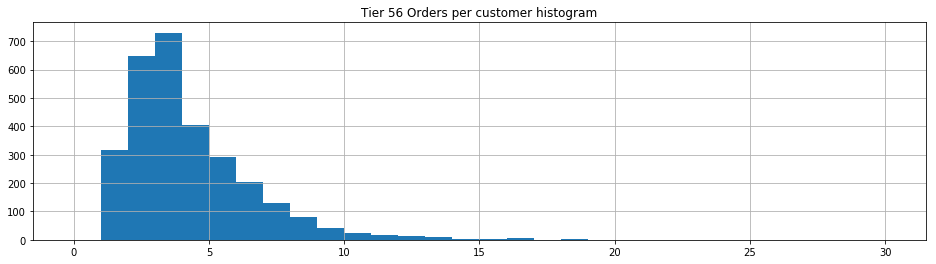

,ORDERS
count,2935.00
mean,3.79
std,2.43
min,1.00
25%,2.00
50%,3.00
75%,5.00
max,22.00


2.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  2.0  we keep eligible a  75.16  % from our customers
With CM2% threshold >= 7 and Orders >=  2.0  we keep eligible a  68.82  % from our customers
With CM2% threshold >=  8.511999999999999  and Orders >=  2.0  we keep eligible a  62.76  % from our customers
                                                                                                                    
                                                                                                                    


In [12]:
for tq in tiers:
    data_tier = data[data['ZTQ_ID'] == tq]
    print('...........................................................TIER ', tq, '..........................................................')
    # CM2% per customer
    plt.figure(figsize=(16,4))
    data_tier['CM2_REL'].hist(bins=100, range=(-50, 50))
    title = 'Tier ' + str(tq) + '  Relative CM2 % per customer histogram'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['CM2_REL'].fillna(0).describe().round(2)))
    perc_30_cm2_rel = data_tier['CM2_REL'].fillna(0).quantile(.3)
    print('CM2% threshold >= 5  is the percentile', stats.percentileofscore(data_tier['CM2_REL'], 5, kind='strict').round(2))
    print('CM2% threshold >= 7  is the percentile', stats.percentileofscore(data_tier['CM2_REL'], 7, kind='strict').round(2))
    print('CM2% threshold >= ', perc_30_cm2_rel, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    # CM2 € per customer
    #plt.figure(figsize=(16,4))
    #data_tier['TOTAL_CM2'].hist(bins=200, range=(-50, 150))
    #title = 'Tier ' + str(tq) + ' Absolute CM2 per customer histogram'
    #plt.title(title)
    #plt.show()
    #display(pd.DataFrame(data_tier['TOTAL_CM2'].describe().round(2)))
    #perc_30_cm2_abs = data_tier['TOTAL_CM2'].fillna(0).quantile(.3)
    #val1 = float(data_tier[(data_tier['CM2_REL'] >= 5) & (data_tier['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    #val2 = float(data_tier[(data_tier['CM2_REL'] >= 7) & (data_tier['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    #val3 = float(data_tier[(data_tier['CM2_REL'] >= perc_30_cm2_rel) & (data_tier['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    #print(perc_30_cm2_abs, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    #print('                                                                                                                    ')
    #print('With CM2% threshold >= 5 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val1, 2), ' % from our customers')
    #print('With CM2% threshold >= 7 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val2, 2), ' % from our customers')
    #print('With CM2% threshold >= ', perc_30_cm2_rel, ' and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val3, 2), ' % from our customers')
    # Orders per customer
    plt.figure(figsize=(16,4))
    data_tier['ORDERS'].hist(bins=30, range=(0, 30))
    title = 'Tier ' + str(tq) + ' Orders per customer histogram'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['ORDERS'].describe().round(2)))
    perc_30_orders = data_tier['ORDERS'].quantile(.3)
    val4 = float(data_tier[(data_tier['CM2_REL'] >= 5) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val5 = float(data_tier[(data_tier['CM2_REL'] >= 7) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val6 = float(data_tier[(data_tier['CM2_REL'] >= perc_30_cm2_rel) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    print(perc_30_orders, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    print('                                                                                                                    ')
    print('With CM2% threshold >= 5 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val4, 2), ' % from our customers')
    print('With CM2% threshold >= 7 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val5, 2), ' % from our customers')
    print('With CM2% threshold >= ', perc_30_cm2_rel, ' and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val6, 2), ' % from our customers')
    print('                                                                                                                    ')
    print('                                                                                                                    ')

In [13]:
data['NET_BASKET_VALUE'] = data['NET_SALES'] / data['ORDERS']

In [14]:
data[(data['ORDERS'] >= 4) & (data['ORDERS'] <= 10)].groupby('ZTQ_ID')['NET_BASKET_VALUE'].describe()

,count,mean,std,min,25%,50%,75%,max
ZTQ_ID,,,,,,,,
51,2273.0,82.988288,33.981828,28.573425,59.569675,74.741817,98.576256,360.822450
52,2736.0,92.447210,39.995218,31.052586,64.721054,82.844877,110.474686,457.838625
53,1436.0,85.898158,34.484653,31.012357,61.119098,77.601460,103.824834,329.327817
54,2069.0,100.264693,44.072685,31.457980,70.385275,91.418960,119.327300,462.464800
55,116.0,68.305484,28.714025,30.341580,49.065419,60.154429,77.006676,218.264633
56,1180.0,83.367983,37.733161,30.728600,58.861335,74.829620,100.154060,522.646725


In [15]:
data[(data['ORDERS'] >= 4) & (data['ORDERS'] <= 10)].groupby('ZTQ_ID')['CM2_REL'].describe()

,count,mean,std,min,25%,50%,75%,max
ZTQ_ID,,,,,,,,
51,2273.0,13.913339,5.839661,-7.71,10.3100,14.020,17.630,40.88
52,2736.0,12.879298,6.500939,-18.83,8.8775,13.100,17.030,44.66
53,1436.0,14.435675,7.665208,-29.37,9.2550,13.925,19.145,42.65
54,2069.0,12.509662,7.664749,-46.98,7.3700,12.380,17.450,41.44
55,116.0,12.634310,7.543936,-5.01,8.0500,12.080,16.940,40.13
56,1180.0,12.071390,6.806989,-9.03,7.8850,11.950,16.110,43.52


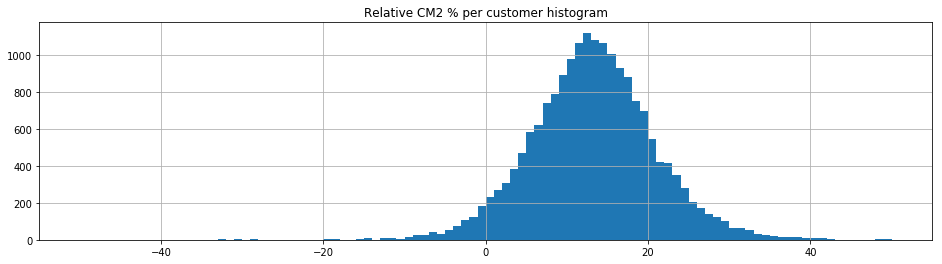

,CM2_REL
count,18678.00
mean,13.16
std,7.82
min,-128.51
25%,8.41
50%,13.16
75%,17.85
max,50.70


CM2% threshold >= 5  is the percentile 12.87
CM2% threshold >= 6  is the percentile 15.99
CM2% threshold >= 7  is the percentile 19.32
CM2% threshold >= 8  is the percentile 23.27
CM2% threshold >= 9  is the percentile 27.49
CM2% threshold >= 10  is the percentile 32.26
CM2% threshold >=  9.55  is the percentile 30 allowing us to stay with the 70% of our sample


In [16]:
# CM2% per customer
plt.figure(figsize=(16,4))
data['CM2_REL'].hist(bins=100, range=(-50, 50))
title = 'Relative CM2 % per customer histogram'
plt.title(title)
plt.show()
display(pd.DataFrame(data['CM2_REL'].fillna(0).describe().round(2)))
perc_30_cm2_rel = data['CM2_REL'].fillna(0).quantile(.3)
print('CM2% threshold >= 5  is the percentile', stats.percentileofscore(data['CM2_REL'], 5, kind='strict').round(2))
print('CM2% threshold >= 6  is the percentile', stats.percentileofscore(data['CM2_REL'], 6, kind='strict').round(2))
print('CM2% threshold >= 7  is the percentile', stats.percentileofscore(data['CM2_REL'], 7, kind='strict').round(2))
print('CM2% threshold >= 8  is the percentile', stats.percentileofscore(data['CM2_REL'], 8, kind='strict').round(2))
print('CM2% threshold >= 9  is the percentile', stats.percentileofscore(data['CM2_REL'], 9, kind='strict').round(2))
print('CM2% threshold >= 10  is the percentile', stats.percentileofscore(data['CM2_REL'], 10, kind='strict').round(2))
print('CM2% threshold >= ', perc_30_cm2_rel, ' is the percentile 30 allowing us to stay with the 70% of our sample')
# CM2 € per customer
#plt.figure(figsize=(16,4))
#data['TOTAL_CM2'].hist(bins=200, range=(-50, 150))
#title = 'Tier ' + str(tq) + ' Absolute CM2 per customer histogram'
#plt.title(title)
#plt.show()
#display(pd.DataFrame(data['TOTAL_CM2'].describe().round(2)))
#perc_30_cm2_abs = data['TOTAL_CM2'].fillna(0).quantile(.3)
#val1 = float(data[(data['CM2_REL'] >= 5) & (data['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val2 = float(data[(data['CM2_REL'] >= 7) & (data['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val3 = float(data[(data['CM2_REL'] >= perc_30_cm2_rel) & (data['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#print(perc_30_cm2_abs, ' is the percentile 30 allowing us to stay with the 70% of our sample')
#print('                                                                                                                    ')
#print('With CM2% threshold >= 5 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val1, 2), ' % from our customers')
#print('With CM2% threshold >= 7 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val2, 2), ' % from our customers')
#print('With CM2% threshold >= ', perc_30_cm2_rel, ' and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val3, 2), ' % from our customers')
# Orders per customer
#plt.figure(figsize=(16,4))
#data['ORDERS'].hist(bins=30, range=(0, 30))
#title = 'Tier ' + str(tq) + ' Orders per customer histogram'
#plt.title(title)
#plt.show()
#display(pd.DataFrame(data['ORDERS'].describe().round(2)))
#perc_30_orders = data['ORDERS'].quantile(.3)
#val4 = float(data[(data['CM2_REL'] >= 5) & (data['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val5 = float(data[(data['CM2_REL'] >= 7) & (data['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val6 = float(data[(data['CM2_REL'] >= perc_30_cm2_rel) & (data['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#print(perc_30_orders, ' is the percentile 30 allowing us to stay with the 70% of our sample')
#print('                                                                                                                    ')
#print('With CM2% threshold >= 5 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val4, 2), ' % from our customers')
#print('With CM2% threshold >= 7 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val5, 2), ' % from our customers')
#print('With CM2% threshold >= ', perc_30_cm2_rel, ' and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val6, 2), ' % from our customers')
#print('                                                                                                                    ')
#print('                                                                                                                    ')

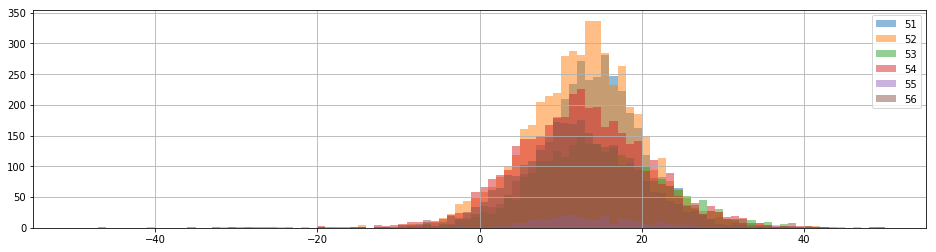

In [17]:
plt.figure(figsize=(16,4))
for tq in tiers:
    data_tier = data[data['ZTQ_ID'] == tq]
    #print('...........................................................TIER ', tq, '..........................................................')
    # CM2% per customer
    data_tier['CM2_REL'].hist(bins=100, range=(-50, 50), alpha=0.5)
    plt.legend([51, 52, 53, 54, 55, 56])
plt.show()   